In [1]:
import warnings
warnings.filterwarnings('ignore')
from pc_model import plot_query, score_query, score_model_similarity, Marr2Algorithms
import numpy as np
import seaborn as sb
import sys
from scipy.stats import wilcoxon, ttest_1samp
sb.set()
from matplotlib import pyplot as pl
np.random.seed()
%matplotlib inline
sb.set()
current_palette = sb.color_palette()



In [2]:
run pc_model

Building Independent Reg Model
Building Independent Reg Model
Building Multiple Reg Model
Building Multiple Reg Model
Building Multiple Reg Model
Building Multiple Reg Model
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
[Counter({1: 112, 2: 19, 3: 8}), Counter({1: 59, 2: 58, 3: 22}), Counter({1: 58, 2: 58, 3: 23}), Counter({1: 82, 2: 37, 3: 20}), Counter({1: 102, 2: 21, 3: 16}), Counter({1: 101, 2: 20, 3: 18}), Counter({1: 96, 2: 25, 3: 18}), Counter({1: 98, 2: 23, 3: 18}), Counter({2: 100, 3: 37, 1: 2}), Counter({2: 98, 3: 38, 1: 3})]


In [3]:
marralgs = Marr2Algorithms(p_inits, strike_params)
marralgs.run_marr2_models(25)
marralgs.result_plotter()

in bayes
8
2
10
4
5
13
6
14
5
6
6
8
8
7
6
10
6
5
7
5
8
14
6
3
6
13
7
5
9
3
10
3
6
8
7
4
11
8
4
4
5
8
3
6
9
5
11
11
4
8
3
2
7
5
4
4
4
10
6
5
2
6
5
6
7
3
6
3
4
7
4
2
4
5
3
14
10
4
3
3
2
4
6
3
5
6
9
4
2
4
4
2
3
4
2
3
8
8
4
13
20
2
5
6
11
3
4
1
3
4
7
2
6
3
2
6
14
4
4
5
3
3
8
5
6
4
9
4
2
7
7
5
7
7
5
8
6
12
3
7
2
5
3
5
13
9
11
2
2
7
9
7
7
10
9
12
12
7
12
7
8
2
9
7
10
5
7
12
4
4
12
3
10
4
3
8
6
6
5
4
11
9
3
6
20
10
13
3
7
13
4
5
12
15
7
8
7
6
2
7
8
4
8
6
5
4
4
3
5
5
5
9
3
10
6
13
5
13
3
8
2
10
8
6
9
7
9
5
7
7
14
8
4
6
5
10
3
4
9
20
8
7
17
7
10
4
1
16
4
4
3
5
4
2
12
4
4
5
11
3
5
10
4
12
3
7
6
3
3
6
5
7
6
9
3
4
15
7
11
4
5
3
8
12
7
9
2
7
5
5
9
7
9
11
15
11
11
7
8
7
3
3
7
8
6
4
12
2
6
9
5
5
4
2
5
7
15
6
9
4
3
5
8
3
8
8
10
5
14
3
10
6
4
6
4
10
9
5
10
9
5
8
8
5
2
9
15
9
9
2
2
9
2
2
6
8
2
3
10
4
11
6
4
5
10
4
10
8
7
10
11
4
3
4
5
5
4
6
4
7
5
6
4
2
4
1
11
6
9
15
8
6
2
7
8
3
6
5
11
4
13
3
16
8
4
9
3
5
7
9
14
3
6
3
5
7
5
9
6
14
4
9
6
4
9
2
4
11
14
10
5
7
4
9
8
9
7
11
5
4
2
8
11
7
6
6
6
3
6
5
13
9
2
8


AttributeError: Marr2Algorithms instance has no attribute 'result_plotter'

[Ttest_indResult(statistic=2.6163850252182876, pvalue=0.0093761202937631179), Ttest_indResult(statistic=-0.39936438501112054, pvalue=0.68993358391643733), Ttest_indResult(statistic=0.59346778912497977, pvalue=0.55335416333457677), Ttest_indResult(statistic=0.81224935120279596, pvalue=0.41734857691797134), Ttest_indResult(statistic=0.4183498817793464, pvalue=0.67601665267905409), Ttest_indResult(statistic=-0.85622194513383321, pvalue=0.39261777265081543), Ttest_indResult(statistic=nan, pvalue=nan), Ttest_indResult(statistic=0.88571189799348549, pvalue=0.37654381892961664), Ttest_indResult(statistic=-0.10320136741222204, pvalue=0.9178781001874321), Ttest_indResult(statistic=nan, pvalue=nan), Ttest_indResult(statistic=0.58784948073056309, pvalue=0.5571139880540994), Ttest_indResult(statistic=0.35294816323265449, pvalue=0.7243967043183378), Ttest_indResult(statistic=0.32526697801192178, pvalue=0.74522545375361138), Ttest_indResult(statistic=nan, pvalue=nan), Ttest_indResult(statistic=0.641

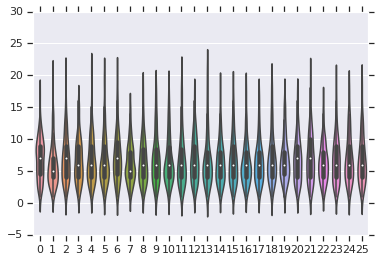

In [4]:
marralgs.result_compiler()

In [3]:
meds = [5.0, 7.0, 6.0, 6.0, 6.0, 7.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0]
from scipy.stats import mannwhitneyu
mannwhitneyu([7], meds)

MannwhitneyuResult(statistic=2.0, pvalue=0.042996056383766197)

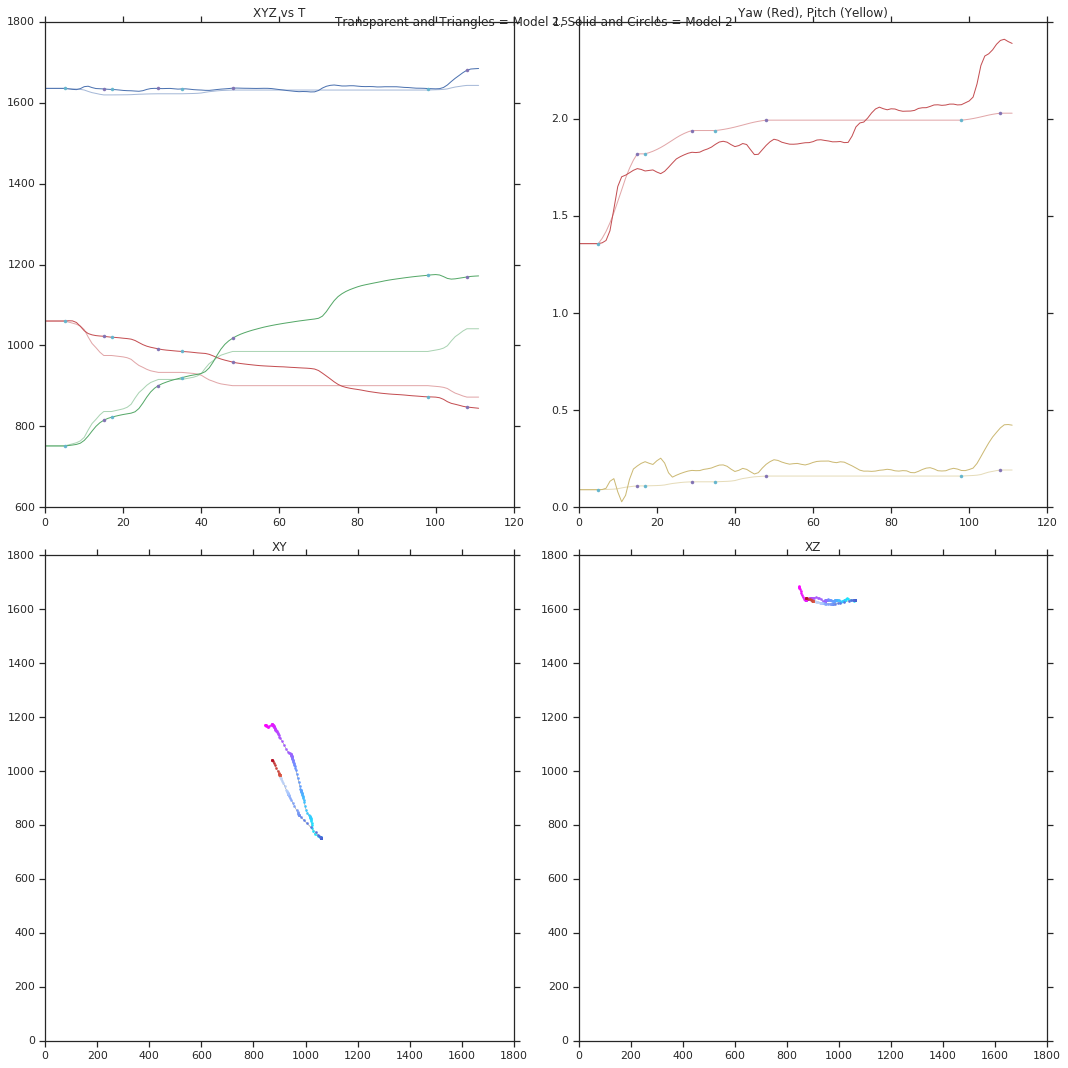

(93.988629178397886, -0.059062500000000004, 0.0094107142857143278)

In [11]:
sb.set_style('white')
score_trajectory_similarity(True, simlist_by_hunt[100][0], simlist_by_hunt[100][2])

In [4]:
def score_model_similarity(mod1, mod2, simlist_by_huntid, num_partitions):

    def avg_of_partitions(arr):
        arr_partitioned = np.array(
            [np.nanmean(p) for p in [
                partition(len(xs) / num_partitions, xs) for xs in arr]])
        means_by_partition = [arr_partitioned[:, n] for n in range(
            num_partitions)]
        return means_by_partition
    scores = []
    for sims in simlist_by_huntid:
        sim1 = sims[mod1]
        sim2 = sims[mod2]
        scores.append(score_trajectory_similarity(
            False, sim1, sim2))
    scores = np.array(scores)
    xyz_sim = avg_of_partitions(scores[:, 0])
    pitch_scores = avg_of_partitions(scores[:, 1])
    yaw_scores = avg_of_partitions(scores[:, 2])
    sb.violinplot(data=xyz_sim + pitch_scores + yaw_scores)
    pl.show()
    return xyz_sim, pitch_scores, yaw_scores

In [5]:
scores02 = score_model_similarity(0, 1, simlist_by_hunt, 4)
#scores03 = score_model_similarity(0, 3, simlist_by_hunt)
#scores04 = score_model_similarity(0, 4, simlist_by_hunt)
#scores23 = score_model_similarity(2, 3, simlist_by_hunt)

TypeError: unsupported operand type(s) for /: 'itertools.izip' and 'int'

[ 20.50335115  33.68205136  55.54784993]
[ 18.06431857  31.36576093  52.36732818]
[ 22.31550206  48.07402312  87.51788243]
[  4.35864638   7.34218285  10.88606113]


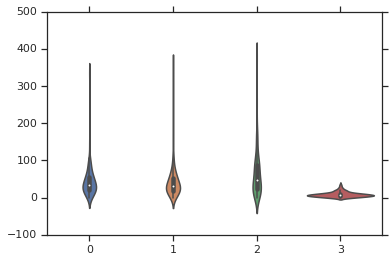

In [9]:
v = 0
sb.violinplot(data=[scores02[v], scores03[v], scores04[v], scores23[v]])
print np.percentile(scores02[v], [25, 50, 75])
print np.percentile(scores03[v], [25, 50, 75])
print np.percentile(scores04[v], [25, 50, 75])
print np.percentile(scores23[v], [25, 50, 75])



In [20]:
marralgs = Marr2Algorithms(np.array(p_inits[0:2]), strike_params)
marralgs.marr_bdb_file.np_prng

In [5]:
marralgs.run_marr2_models()

in bayes
{'Para Alt': 0.21946309470753914, 'Para Az': -0.87878194986387825, 'Para Dist': 314.59252497452428}
{'Para Alt': 0.24888271368568035, 'Para Az': -0.41734288597898306, 'Para Dist': 286.96179824877794}
{'Para Alt': 0.34630985221486049, 'Para Az': 0.22164247073442184, 'Para Dist': 217.95294779615608}
{'Para Alt': 0.69232131451982393, 'Para Az': -0.065001753447018251, 'Para Dist': 162.63795683015897}
{'Para Alt': 0.9442427025512663, 'Para Az': 0.21858068035556216, 'Para Dist': 144.97942663383529}
{'Para Alt': 0.19225918441074211, 'Para Az': 0.24201327629701111, 'Para Dist': 138.01875531568672}
{'Para Alt': 0.091159282892932958, 'Para Az': -0.16298869656702578, 'Para Dist': 52.487400948080051}
{'Para Alt': 0.40884751764809779, 'Para Az': -0.04288735649735434, 'Para Dist': 72.915532081880713}


In [8]:
marralgs = Marr2Algorithms(np.array(p_inits[0:2]), strike_params)
marralgs.run_marr2_models()


in bayes
{'Para Alt': 0.21946309470753914, 'Para Az': -0.87878194986387825, 'Para Dist': 314.59252497452428}
{'Para Alt': 0.24888271368568035, 'Para Az': -0.41734288597898306, 'Para Dist': 286.96179824877794}
{'Para Alt': 0.34630985221486049, 'Para Az': 0.22164247073442184, 'Para Dist': 217.95294779615608}
{'Para Alt': 0.69232131451982393, 'Para Az': -0.065001753447018251, 'Para Dist': 162.63795683015897}
{'Para Alt': 0.9442427025512663, 'Para Az': 0.21858068035556216, 'Para Dist': 144.97942663383529}
{'Para Alt': 0.19225918441074211, 'Para Az': 0.24201327629701111, 'Para Dist': 138.01875531568672}
{'Para Alt': 0.091159282892932958, 'Para Az': -0.16298869656702578, 'Para Dist': 52.487400948080051}
{'Para Alt': 0.40884751764809779, 'Para Az': -0.04288735649735434, 'Para Dist': 72.915532081880713}


[(139,), (139,), (139,), (139,), (139,), (139,), (139,), (139,), (139,), (139,)]
[(), (), (), (), (), (), (), (), (), ()]
[(139,), (139,), (139,), (139,), (139,), (139,), (139,), (139,), (139,), (139,)]
[(139,), (139,), (139,), (139,), (139,), (139,), (139,), (139,), (139,), (139,)]
[(139,), (139,), (139,), (139,), (139,), (139,), (139,), (139,), (139,), (139,)]


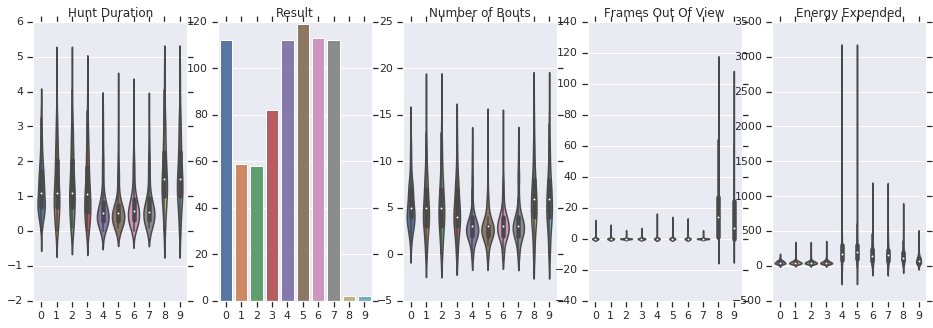

In [3]:
fig = plot_query(ms, p_inits, strike_params, 'violin')
fig.savefig('model_results.pdf')